### Loading the dataset

In [1]:
import pandas as pd

In [2]:
!pwd

/Users/manaranjan/Documents/Work/Data Science/Python/2Days Program/data/CISCO 02 April


In [3]:
!ls -al

total 256
drwxr-xr-x   13 manaranjan  staff    442 Apr  2 14:15 .
drwxr-xr-x  110 manaranjan  staff   3740 Apr  2 11:07 ..
-rw-r--r--@   1 manaranjan  staff   6148 Apr  2 11:09 .DS_Store
drwxr-xr-x    5 manaranjan  staff    170 Apr  2 14:12 .ipynb_checkpoints
-rw-r--r--    1 manaranjan  staff   7891 Apr  2 14:13 Cars Performance 1.0.ipynb
-rw-r--r--    1 manaranjan  staff   1616 Apr  2 11:40 My First Program 1.0.ipynb
-rw-r--r--@   1 manaranjan  staff    340 Apr  2 14:14 Titanic Complete.atp
-rw-r--r--    1 manaranjan  staff  74768 Apr  2 14:11 Titanic Exploration 1.0.ipynb
-rw-r--r--@   1 manaranjan  staff   1644 Apr  2 14:15 Titanic Poll Results.csv
-rw-r--r--@   1 manaranjan  staff     88 Apr  2 14:10 age.csv
-rw-r--r--    1 manaranjan  staff  10158 Apr  2 12:53 age.png
drwxr-xr-x   12 manaranjan  staff    408 Jun 13  2019 data
-rw-r--r--    1 manaranjan  staff   8076 Apr  2 12:57 survived.png


In [4]:
auto_df = pd.read_csv( "./data/Auto.csv" )

In [5]:
auto_df.head(5)

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [7]:
auto_df[-auto_df.horsepower.str.isnumeric()]

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i

### Data Clean Up

In [10]:
auto_df['horsepower'] = pd.to_numeric( auto_df['horsepower'],
                                       errors = 'coerce')

In [11]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## Unique Values

In [12]:
auto_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [13]:
auto_df.origin.unique()

array([1, 3, 2])

Origin: 
- 1 - American
- 2 - European
- 3 - Japanese

## Insights

#### Which origin (American vs Japanese) manufacturers were producing cars with higher fuel efficiency during 1970-1982?

#### Comparison between American and Japanese

In [17]:
american_cars = auto_df[auto_df.origin == 1]
european_cars = auto_df[auto_df.origin == 2]
japanese_cars = auto_df[auto_df.origin == 3]

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

- Overlapped Distribtion plot can be used to compare one numerican with one categorical vaariable.

/Users/manaranjan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


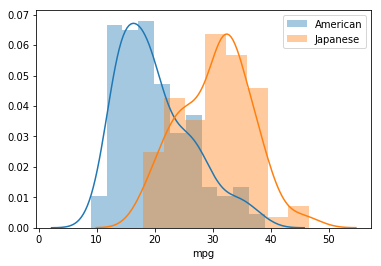

In [20]:
sn.distplot( american_cars['mpg'], label = 'American' )
sn.distplot( japanese_cars['mpg'], label = 'Japanese' );
plt.legend();

### Question 1:

Between all origins, compare the mpgs of cars.

### Which origin (A/E/J) manufacturers were producing cars with more power?

/Users/manaranjan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


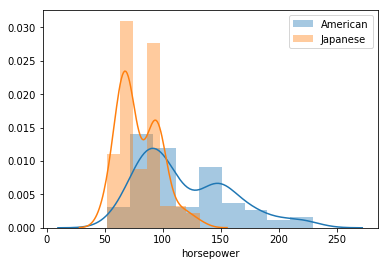

In [22]:
sn.distplot( american_cars['horsepower'].dropna(), 
            label = 'American' )
sn.distplot( japanese_cars['horsepower'].dropna(), 
            label = 'Japanese' );
plt.legend();

### Scatter Plot

Compare two numerical variables

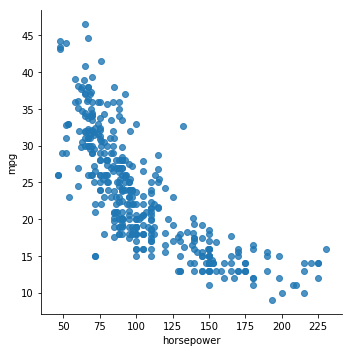

In [26]:
sn.lmplot( data = auto_df,
           x = 'horsepower',
           y = 'mpg',
           fit_reg = False );

### Question 2:

Find two variables who has positive correlation among the following ones.

- mpg
- weight
- displacement
- acceleration
- horsepower

### Finding Correlation between Variables

mpg, weight, acceleration, displcement, horsepower

In [32]:
### The columns are numerical variables
auto_df[['mpg', 
         'weight', 
         'acceleration', 
         'displacement', 
         'horsepower']].corr()

mpg    weight  acceleration  displacement  horsepower
mpg           1.000000 -0.831739      0.422297     -0.804443   -0.778427
weight       -0.831739  1.000000     -0.419502      0.933104    0.864538
acceleration  0.422297 -0.419502      1.000000     -0.544162   -0.689196
displacement -0.804443  0.933104     -0.544162      1.000000    0.897257
horsepower   -0.778427  0.864538     -0.689196      0.897257    1.000000

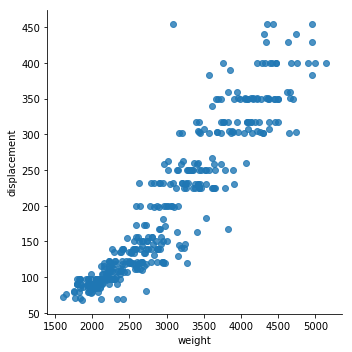

In [28]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'displacement',
           fit_reg = False );

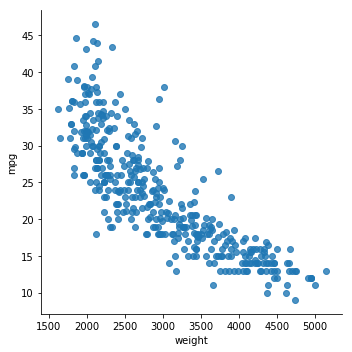

In [33]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'mpg',
           fit_reg = False );

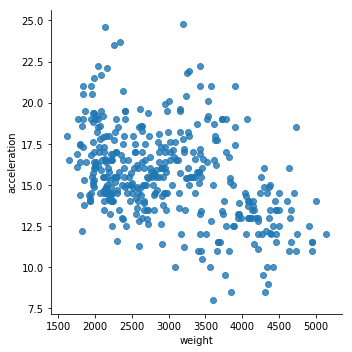

In [31]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'acceleration',
           fit_reg = False );

In [34]:
corr_mat = auto_df[['mpg', 
                    'weight', 
                    'acceleration', 
                    'displacement', 
                    'horsepower']].corr()

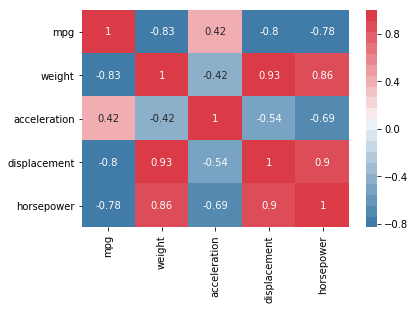

In [35]:
sn.heatmap( corr_mat,
            annot = True,
            cmap = sn.diverging_palette( 240, 10, n = 20 ) );

### Discussion 

- 13, 14, 15, 16, 17 - Mean: 15, std 
- 5, 10, 15, 20, 25 - Mean: 15, std

### Basic Statistics

In [38]:
american_cars.mpg.mean()

20.071774193548382

In [39]:
japanese_cars.mpg.mean()

30.450632911392397

In [40]:
american_cars.mpg.std()

6.413145160339849

In [41]:
japanese_cars.mpg.std()

6.090048069738324

In [43]:
from scipy import stats

In [46]:
stats.norm.interval( 0.8,
                     american_cars.mpg.mean(),
                     american_cars.mpg.std() )

(11.852997973250071, 28.290550413846695)

In [47]:
stats.norm.interval( 0.8,
                     japanese_cars.mpg.mean(),
                     japanese_cars.mpg.std() )

(22.645922273377376, 38.255343549407414)